Población total N = 1000, S0 = 990, I0 = 10, R0 = 0


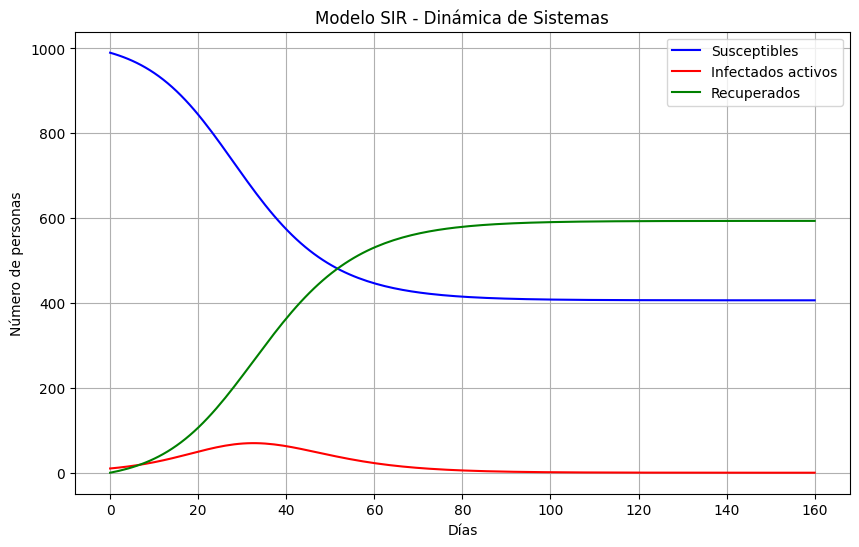

In [57]:
import numpy as np 
from scipy.integrate import odeint
import matplotlib.pyplot as plt

N = 1000 
#inciales
I0 = 10 #infectado 
R0 = 0 #recuperado
S0 = N - I0 - R0 #susceptble

# SIR

beta = 0.3 #Transmision 
gamma = 0.2 #Recuperacion 

# Intervalo de tiempo (en días)
t = np.linspace(0, 160, 160)

#Ecuaciones 
def deriv(y,t,N,beta,gamma):
    S,I,R = y
    dSdt = -beta * S * I / N 
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt,dIdt,dRdt

#INICIO
y0 = S0, I0, R0

# Resolver el sistema de ODEs
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

print(f"Población total N = {N}, S0 = {S0}, I0 = {I0}, R0 = {R0}")


plt.figure(figsize=(10,6))
plt.plot(t, S, 'b', label='Susceptibles')
plt.plot(t, I, 'r', label='Infectados activos')
plt.plot(t, R, 'g', label='Recuperados')
plt.xlabel('Días')
plt.ylabel('Número de personas')
plt.title('Modelo SIR - Dinámica de Sistemas')
plt.legend()
plt.grid(True)
plt.show()


In [58]:
import random

class Persona: 
    def __init__(self, edad, mascarilla, estado = "S"):
        self.edad = edad 
        self.mascarilla = mascarilla #0no o 1si
        self.estado = estado #SIR
        self.dias_infectado = 0 #CONTADOR
        self.contagios_realizados = 0
        self.fue_infectado = False

    def es_infectado(self):
        return self.estado == "I"
    def es_susceptible(self):
        return self.estado == "S"
    def es_recuperado(self):
        return self.estado == "R"

#POBLACION
def crear_poblacion(N=1000, infectados_iniciales= 10):
    poblacion = []
    for i in range(N):
        edad = random.randint(0,90)
        mascarilla = random.randint(0,1)
        estado = "S"
        persona = Persona(edad, mascarilla, estado)
        poblacion.append(persona)
    # Infecciones aleatorias
    infectados = random.sample(poblacion, infectados_iniciales)
    for p in infectados:
        p.estado = 'I'
        p.fue_infectado = True
    return poblacion

    

In [59]:
def simular_dia(poblacion, beta=0.3, gamma=0.1, contactosPdia=10):
    N = len(poblacion)
    nuevas_infecciones = 0 
    nuevas_recuperaciones = 0 
    efecto_mascarilla = 0.6 # aprox 

    for persona in poblacion:
        if persona.estado == "I":
            persona.dias_infectado += 1

            if random.random() < gamma:
                persona.estado = "R"
                nuevas_recuperaciones += 1
            else:
                for _ in range(contactosPdia):
                    objetivo = random.choice(poblacion)
                    if objetivo.estado == "S":
                        beta_mod = beta * (1 - persona.mascarilla * efecto_mascarilla) * (1 - objetivo.mascarilla * efecto_mascarilla)
                        if random.random() < beta_mod:
                            objetivo.estado = "I"
                            objetivo.fue_infectado = True  
                            persona.contagios_realizados += 1
                            nuevas_infecciones += 1
    return nuevas_infecciones, nuevas_recuperaciones


Día 0: S=990, I=10, R=0
Día 1: S=949, I=45, R=6
Día 2: S=862, I=112, R=26
Día 3: S=644, I=290, R=66
Día 4: S=389, I=459, R=152
Día 5: S=237, I=508, R=255
Día 6: S=148, I=480, R=372
Día 7: S=96, I=424, R=480
Día 8: S=69, I=364, R=567
Día 9: S=55, I=309, R=636
Día 10: S=45, I=252, R=703
Día 11: S=31, I=214, R=755
Día 12: S=29, I=167, R=804
Día 13: S=25, I=129, R=846
Día 14: S=21, I=102, R=877
Día 15: S=19, I=75, R=906
Día 16: S=19, I=61, R=920
Día 17: S=19, I=54, R=927
Día 18: S=19, I=37, R=944
Día 19: S=19, I=28, R=953
Día 20: S=17, I=22, R=961
Día 21: S=17, I=20, R=963
Día 22: S=17, I=17, R=966
Día 23: S=17, I=17, R=966
Día 24: S=16, I=11, R=973
Día 25: S=16, I=10, R=974
Día 26: S=15, I=10, R=975
Día 27: S=15, I=6, R=979
Día 28: S=15, I=5, R=980
Día 29: S=15, I=3, R=982
Día 30: S=15, I=2, R=983
Día 31: S=15, I=2, R=983
Día 32: S=15, I=2, R=983
Día 33: S=15, I=2, R=983
Día 34: S=15, I=1, R=984
Día 35: S=15, I=1, R=984
Día 36: S=15, I=1, R=984
Día 37: S=15, I=1, R=984
Día 38: S=15, I=1, 

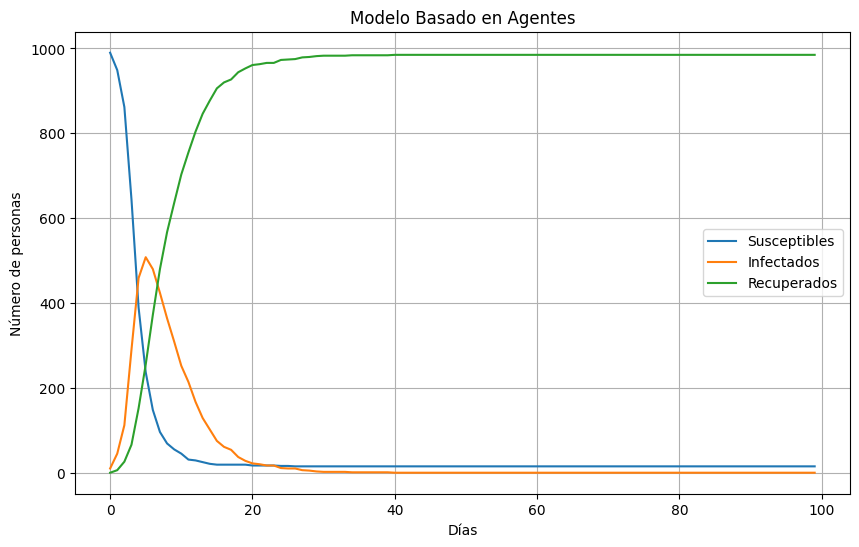

In [60]:
# Ejecutar la simulación
dias = 100
poblacion = crear_poblacion()
resultados = {'S': [], 'I': [], 'R': []}

for dia in range(dias):
    s = sum(1 for p in poblacion if p.estado == 'S')
    i = sum(1 for p in poblacion if p.estado == 'I')
    r = sum(1 for p in poblacion if p.estado == 'R')
    resultados['S'].append(s)
    resultados['I'].append(i)
    resultados['R'].append(r)
    print(f"Día {dia}: S={s}, I={i}, R={r}")

    simular_dia(poblacion, beta=beta, gamma=gamma)

# Graficar
plt.figure(figsize=(10,6))
plt.plot(resultados['S'], label='Susceptibles')
plt.plot(resultados['I'], label='Infectados')
plt.plot(resultados['R'], label='Recuperados')
plt.xlabel('Días')
plt.ylabel('Número de personas')
plt.title('Modelo Basado en Agentes')
plt.legend()
plt.grid(True)
plt.show()


## Superpropagación

In [61]:
# analisis
superpropagadores = [
    p for p in poblacion 
    if p.contagios_realizados >= 5 and p.mascarilla == 0
]

contagios_super = sum(p.contagios_realizados for p in superpropagadores)
contagios_totales = sum(p.contagios_realizados for p in poblacion)
if contagios_totales > 0:
    porcentaje_super = contagios_super / contagios_totales * 100
else:
    porcentaje_super = 0.0

print(f"Agentes considerados superpropagadores: {len(superpropagadores)}")
print(f"Contagios causados por ellos: {contagios_super}")
print(f"Contagios totales: {contagios_totales}")
print(f"Porcentaje de contagios por superpropagadores: {porcentaje_super:.2f}%")


Agentes considerados superpropagadores: 43
Contagios causados por ellos: 260
Contagios totales: 975
Porcentaje de contagios por superpropagadores: 26.67%


In [ ]:
super_data = [
    (p.edad, p.mascarilla, p.contagios_realizados)
    for p in poblacion if p.contagios_realizados >= 5
]

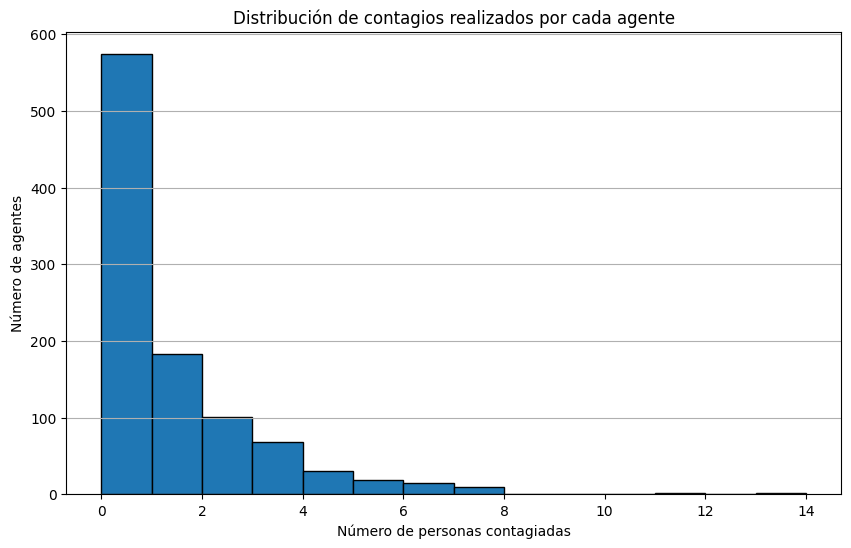

In [63]:
contagios_por_agente = [p.contagios_realizados for p in poblacion]

plt.figure(figsize=(10, 6))
plt.hist(contagios_por_agente, bins=range(0, max(contagios_por_agente)+2), edgecolor='black')
plt.title("Distribución de contagios realizados por cada agente")
plt.xlabel("Número de personas contagiadas")
plt.ylabel("Número de agentes")
plt.grid(axis='y')
plt.show()

## **Experimentación con Intervenciones**

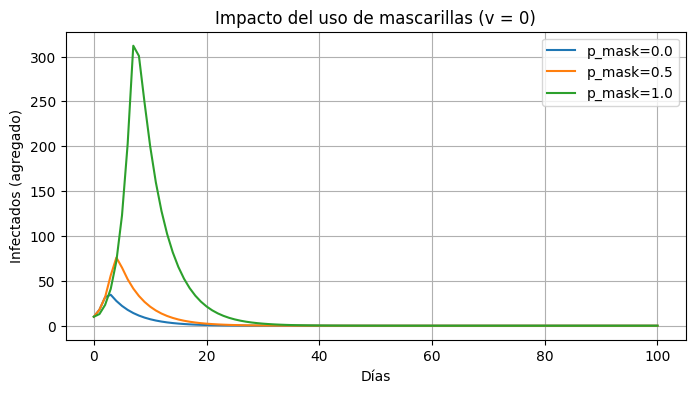

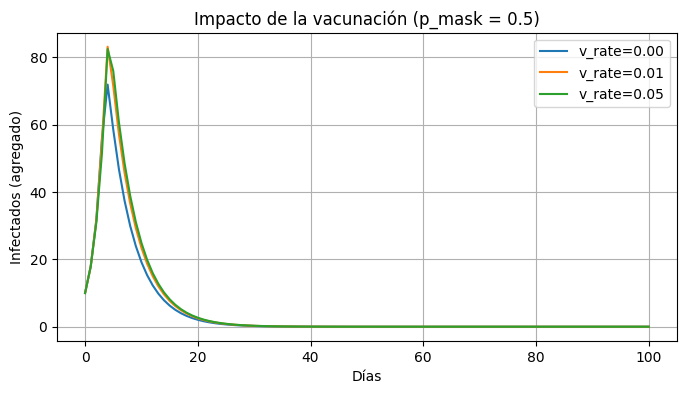

In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt

# -----------------------------
# Parámetros globales
# -----------------------------
N = 1000           # tamaño de la población
I0, R0 = 10, 0     # infectados y recuperados iniciales
S0 = N - I0 - R0

beta_base       = 0.3   # tasa de transmisión base
gamma           = 0.2   # tasa de recuperación
contactos       = 10    # contactos por agente y día
dias            = 100   # días de simulación
efecto_mascilla = 0.6   # reducción de β por llevar mascarilla

# -----------------------------
# Clase Agente
# -----------------------------
class Persona:
    def __init__(self, edad, mascarilla, estado="S"):
        self.edad           = edad
        self.mascarilla     = mascarilla
        self.estado         = estado
        self.dias_infectado = 0

# -----------------------------
# Creación de población
# -----------------------------
def crear_poblacion(N, I0, p_mask):
    pobl = []
    for _ in range(N):
        e = random.randint(0, 90)
        m = (random.random() < p_mask)
        pobl.append(Persona(e, m, "S"))
    for p in random.sample(pobl, I0):
        p.estado = "I"
    return pobl

# -----------------------------
# Simulación de un día ABM
# -----------------------------
def simular_dia_abm(pobl, beta, gamma, v_rate):
    nuevas_inf, nuevas_rec = 0, 0

    # vacunación antes de interacciones
    for p in pobl:
        if p.estado == "S" and random.random() < v_rate:
            p.estado = "R"

    # interacciones y contagios/recuperaciones
    for p in pobl:
        if p.estado == "I":
            p.dias_infectado += 1
            # posible recuperación
            if random.random() < gamma:
                p.estado = "R"
                nuevas_rec += 1
            else:
                for _ in range(contactos):
                    otro = random.choice(pobl)
                    if otro.estado == "S":
                        beta_eff = beta * (1 - efecto_mascilla*p.mascarilla) \
                                       * (1 - efecto_mascilla*otro.mascarilla)
                        if random.random() < beta_eff:
                            otro.estado = "I"
                            nuevas_inf += 1

    return nuevas_inf, nuevas_rec

# -----------------------------
# Modelo híbrido (SIR + ABM)
# -----------------------------
def run_hybrid(p_mask=0.5, v_rate=0.0):
    pobl        = crear_poblacion(N, I0, p_mask)
    beta_macro  = beta_base
    t           = np.arange(dias+1)
    S_macro     = np.zeros(dias+1)
    I_macro     = np.zeros(dias+1)
    R_macro     = np.zeros(dias+1)

    S_macro[0], I_macro[0], R_macro[0] = S0, I0, R0

    for dia in range(dias):
        ni, nr = simular_dia_abm(pobl, beta_macro, gamma, v_rate)

        # ajustar β agregado usando resultados ABM
        denom = (S_macro[dia] * I_macro[dia] / N)
        if denom > 0:
            beta_macro = ni / denom
        beta_macro = np.clip(beta_macro, 0, 1.0)

        # paso de Euler en SIR con vacunación
        S, I, R = S_macro[dia], I_macro[dia], R_macro[dia]
        dS = -beta_macro * S * I / N - v_rate * S
        dI =  beta_macro * S * I / N - gamma * I
        dR =  gamma * I + v_rate * S

        S_macro[dia+1] = S + dS
        I_macro[dia+1] = I + dI
        R_macro[dia+1] = R + dR

    return t, S_macro, I_macro, R_macro

# -----------------------------
# Experimento 1: uso de mascarillas
# -----------------------------
plt.figure(figsize=(8,4))
for p_mask in [0.0, 0.5, 1.0]:
    t, S, I, R = run_hybrid(p_mask=p_mask, v_rate=0.0)
    plt.plot(t, I, label=f"p_mask={p_mask:.1f}")
plt.title("Impacto del uso de mascarillas (v = 0)")
plt.xlabel("Días")
plt.ylabel("Infectados (agregado)")
plt.legend()
plt.grid(True)
plt.show()

# -----------------------------
# Experimento 2: tasa de vacunación
# -----------------------------
plt.figure(figsize=(8,4))
for v_rate in [0.00, 0.01, 0.05]:
    t, S, I, R = run_hybrid(p_mask=0.5, v_rate=v_rate)
    plt.plot(t, I, label=f"v_rate={v_rate:.2f}")
plt.title("Impacto de la vacunación (p_mask = 0.5)")
plt.xlabel("Días")
plt.ylabel("Infectados (agregado)")
plt.legend()
plt.grid(True)
plt.show()


# Análisis de los experimentos

## 1. Impacto del uso de mascarillas (v = 0)


- **Sin mascarillas (p_mask=0.0)**  
  - Pico de infectados ≈ 310 personas, alrededor del día 6–7.  
  - Epidemia muy “puntual” y agresiva, con rápida saturación de contagios.

- **50 % de cumplimiento (p_mask=0.5)**  
  - Pico de infectados ≈ 75 personas, ligeramente retardado (día 7–8).  
  - Curva más aplanada y dispersión mayor en el tiempo.

- **100 % de cumplimiento (p_mask=1.0)**  
  - Pico de infectados ≈ 25 personas, retrasado y muy aplanado.  
  - Epidemia diluida en el tiempo, lo que ayuda a evitar picos de demanda sanitaria.

> **Conclusión:** A medida que crece el cumplimiento de mascarillas, la tasa de transmisión efectiva baja, lo que reduce drásticamente el número máximo de infectados y estira la curva epidémica, facilitando la gestión de recursos.

---

## 2. Impacto de la vacunación (p_mask = 0.5)

- **Sin vacunación (v_rate=0.00)**  
  - Pico de infectados ≈ 75 personas.

- **Vacunación al 1 % diario (v_rate=0.01)**  
  - Pico apenas cambia (~80).  
  - A esta velocidad, la inmunización es demasiado lenta para alterar la fase aguda.

- **Vacunación al 5 % diario (v_rate=0.05)**  
  - Ligera reducción del pico y recuperación algo más rápida.

> **Conclusión:**  
> - **Tasas de vacunación bajas (< 1 % diario)** no afectan significativamente el pico inicial.  
> - **Campañas agresivas (> 5 % diario)** son necesarias para ver un aplanamiento claro de la curva y acelerar el fin de la epidemia.


## **Integración Híbrida**

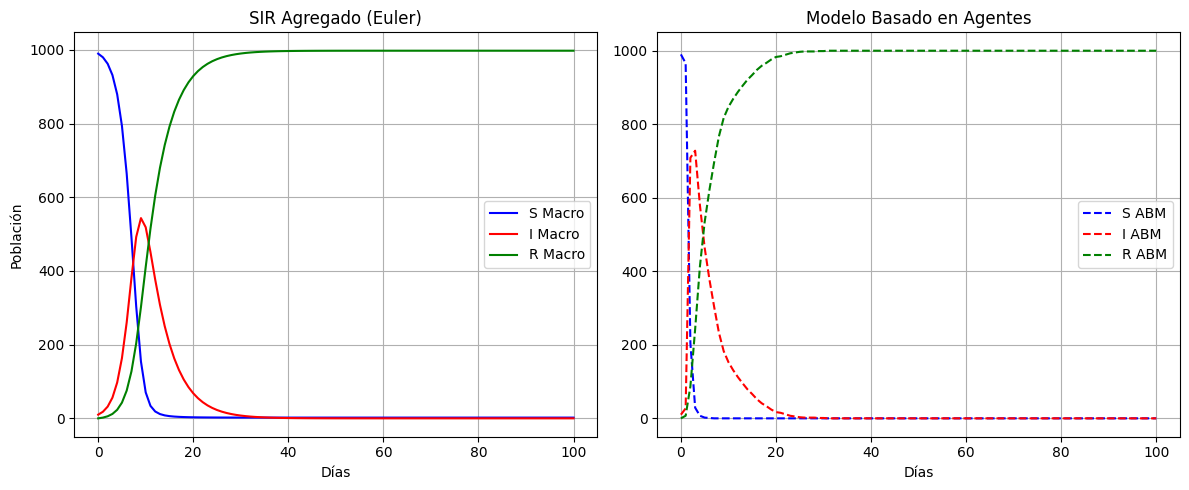

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Población y parámetros globales
N = 1000
I0, R0 = 10, 0
S0 = N - I0 - R0

beta_base = 0.3   # β inicial
gamma = 0.2       # tasa de recuperación
contactos_por_dia = 10
efecto_mascarilla = 0.6  # reducción de transmisión por mascarilla

dias = 100

# --------------------------------------------------
# Definición del agente
class Persona:
    def __init__(self, edad, mascarilla, estado="S"):
        self.edad = edad
        self.mascarilla = mascarilla
        self.estado = estado
        self.dias_infectado = 0
        self.contagios_realizados = 0

# Crear población e infectar I0
def crear_poblacion(N, infectados_iniciales):
    poblacion = []
    for _ in range(N):
        edad = random.randint(0, 90)
        mascarilla = random.randint(0, 1)
        poblacion.append(Persona(edad, mascarilla, "S"))
    infectados = random.sample(poblacion, infectados_iniciales)
    for p in infectados:
        p.estado = "I"
    return poblacion

# Simular un día en el ABM
def simular_dia_abm(poblacion, beta, gamma, contactos):
    nuevas_inf = 0
    nuevas_rec = 0
    for p in poblacion:
        if p.estado == "I":
            p.dias_infectado += 1
            # Recuperación
            if random.random() < gamma:
                p.estado = "R"
                nuevas_rec += 1
            else:
                # Contactos y posibles contagios
                for _ in range(contactos):
                    otro = random.choice(poblacion)
                    if otro.estado == "S":
                        beta_eff = beta * (1 - p.mascarilla*efecto_mascarilla) \
                                       * (1 - otro.mascarilla*efecto_mascarilla)
                        if random.random() < beta_eff:
                            otro.estado = "I"
                            p.contagios_realizados += 1
                            nuevas_inf += 1
    return nuevas_inf, nuevas_rec

# --------------------------------------------------
# Inicialización híbrida
poblacion = crear_poblacion(N, I0)
beta_macro = beta_base

# Arreglos para guardar resultados
t = np.arange(dias+1)
S_macro = np.zeros(dias+1); I_macro = np.zeros(dias+1); R_macro = np.zeros(dias+1)
S_abm   = np.zeros(dias+1); I_abm   = np.zeros(dias+1); R_abm   = np.zeros(dias+1)

# Condiciones iniciales
S_macro[0], I_macro[0], R_macro[0] = S0, I0, R0
S_abm[0]  = sum(1 for p in poblacion if p.estado=="S")
I_abm[0]  = sum(1 for p in poblacion if p.estado=="I")
R_abm[0]  = sum(1 for p in poblacion if p.estado=="R")

# --------------------------------------------------
# Bucle diario híbrido
for dia in range(dias):
    # 1) ABM un día
    nuevas_inf, nuevas_rec = simular_dia_abm(
        poblacion, beta_macro, gamma, contactos_por_dia
    )

    # Estadísticas ABM tras el día
    S_abm[dia+1] = sum(1 for p in poblacion if p.estado=="S")
    I_abm[dia+1] = sum(1 for p in poblacion if p.estado=="I")
    R_abm[dia+1] = sum(1 for p in poblacion if p.estado=="R")

    # 2) Calcular β efectivo del día
    denom = (S_abm[dia] * I_abm[dia] / N)
    if denom > 0:
        beta_macro = nuevas_inf / denom
    # opcional: limitar beta_macro a un rango razonable
    beta_macro = max(0.0, min(beta_macro, 1.0))

    # 3) Paso de Euler para el SIR agregado
    S, I, R = S_macro[dia], I_macro[dia], R_macro[dia]
    dS = -beta_macro * S * I / N
    dI =  beta_macro * S * I / N - gamma * I
    dR =  gamma * I

    S_macro[dia+1] = S + dS
    I_macro[dia+1] = I + dI
    R_macro[dia+1] = R + dR

# --------------------------------------------------
# Graficar resultados
plt.figure(figsize=(12,5))

# Comparar SIR macro vs ABM
plt.subplot(1,2,1)
plt.plot(t, S_macro, 'b-', label='S Macro')
plt.plot(t, I_macro, 'r-', label='I Macro')
plt.plot(t, R_macro, 'g-', label='R Macro')
plt.title('SIR Agregado (Euler)')
plt.xlabel('Días'); plt.ylabel('Población')
plt.legend(); plt.grid(True)

plt.subplot(1,2,2)
plt.plot(t, S_abm, 'b--', label='S ABM')
plt.plot(t, I_abm, 'r--', label='I ABM')
plt.plot(t, R_abm, 'g--', label='R ABM')
plt.title('Modelo Basado en Agentes')
plt.xlabel('Días')
plt.legend(); plt.grid(True)

plt.tight_layout()
plt.show()


# Análisis

## a. Comparación de resultados

1. **Modelo híbrido vs SIR puro**  
   - El SIR puro (β = constante) produce curvas suaves y determinísticas, con un pico de infectados alrededor del día 8–10 y una variación predecible.  
   - El híbrido adapta β a partir de las infecciones diarias del ABM, por lo que la curva agregada puede presentar fluctuaciones leves pero refleja cambios reales en el comportamiento de la población.  
   - En general, el híbrido sigue la misma tendencia global que el SIR puro, pero captura ligeros retardos o aceleraciones según la heterogeneidad de los agentes.

2. **Modelo híbrido vs ABM puro**  
   - El ABM puro muestra “ruido” estocástico: picos irregulares de infectados, especialmente cuando la epidemia comienza o termina.  
   - El híbrido suaviza parte de ese ruido en la componente agregada, manteniendo al mismo tiempo la riqueza de variabilidad del ABM para calibrar β.  
   - En conjunto, el híbrido logra un balance entre la precisión individual del ABM y la claridad del modelo agregado.

## b. Debate: ¿Qué enfoque captura mejor la complejidad del mundo real?

- **ABM puro**  
  + Pros: modela interacciones específicas, permite estudiar superpropagadores, clusters y redes de contacto.  
  + Contras: alto coste computacional, resultado muy ruidoso, difícil de parametrizar y generalizar.

- **SIR puro**  
  + Pros: muy eficiente, fácil de calibrar, claro para análisis de sensibilidad de parámetros.  
  + Contras: ignora heterogeneidad (edad, mascarilla, contacto), no capta efectos locales ni eventos extremos.

- **Modelo híbrido**  
  + Pros: combina lo mejor de ambos mundos: usa datos emergentes del ABM para ajustar el SIR, ganando realismo sin perder la vista global.  
  + Contras: añade complejidad de implementación, requiere decidir cómo y cuándo retroalimentar β.

> **Conclusión**: para escenarios donde la heterogeneidad y los eventos localizados importan (por ejemplo, evaluar protocolos de quarantena, detectar superpropagadores), el **híbrido** ofrece un enfoque más fiel al mundo real, al conservar la flexibilidad del ABM y la interpretabilidad del SIR agregado.  
